In [19]:
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy.stats

import math as m
import statistics

import glob
import os, sys
print(" Danke für die Spielwiese :) ")

 Danke für die Spielwiese :) 


In [20]:
df = pandas.read_csv('gesamtdaten_energien.csv', index_col=0)
print(df.describe())
print(df.head())

       GesamtEnergie
count   18231.000000
mean        1.411104
std         7.264719
min         0.064903
25%         0.649634
50%         0.980337
75%         1.602746
max       842.714539
                        GesamtEnergie
 20220509_16_09_32.wav       0.259039
 20220509_16_09_35.wav     105.340950
 20220509_16_09_38.wav      45.166122
 20220509_16_09_41.wav      13.809454
 20220509_16_09_44.wav      39.506104


In [21]:
df_copy = df.copy()
#df_copy.applymap(lambda x: x/2**15, na_action='ignore')
print(df_copy.describe())

var = df_copy['GesamtEnergie'] / 2 ** 15
df_copy= df_copy.apply(lambda x: x/ 2**15,axis=1)
print(var)

print(df_copy.describe())

       GesamtEnergie
count   18231.000000
mean        1.411104
std         7.264719
min         0.064903
25%         0.649634
50%         0.980337
75%         1.602746
max       842.714539
 20220509_16_09_32.wav    0.000008
 20220509_16_09_35.wav    0.003215
 20220509_16_09_38.wav    0.001378
 20220509_16_09_41.wav    0.000421
 20220509_16_09_44.wav    0.001206
                            ...   
 20220510_09_28_13.wav    0.000021
 20220510_09_28_16.wav    0.000041
 20220510_09_28_19.wav    0.000014
 20220510_09_28_22.wav    0.000017
 20220510_09_28_25.wav    0.000020
Name: GesamtEnergie, Length: 18231, dtype: float64
       GesamtEnergie
count   18231.000000
mean        0.000043
std         0.000222
min         0.000002
25%         0.000020
50%         0.000030
75%         0.000049
max         0.025718


In [22]:
from main import prognose

print(prognose(df_copy))

Prognosewert: GesamtEnergie   -0.0004
dtype: float64 W < x <= GesamtEnergie    0.0005
dtype: float64 W
(GesamtEnergie   -0.000392
dtype: float64, GesamtEnergie    0.000478
dtype: float64)


C:\Users\mirko\anaconda3\envs\sixSigma\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


GesamtEnergie    0.025718
dtype: float64
GesamtEnergie    0.008312
dtype: float64


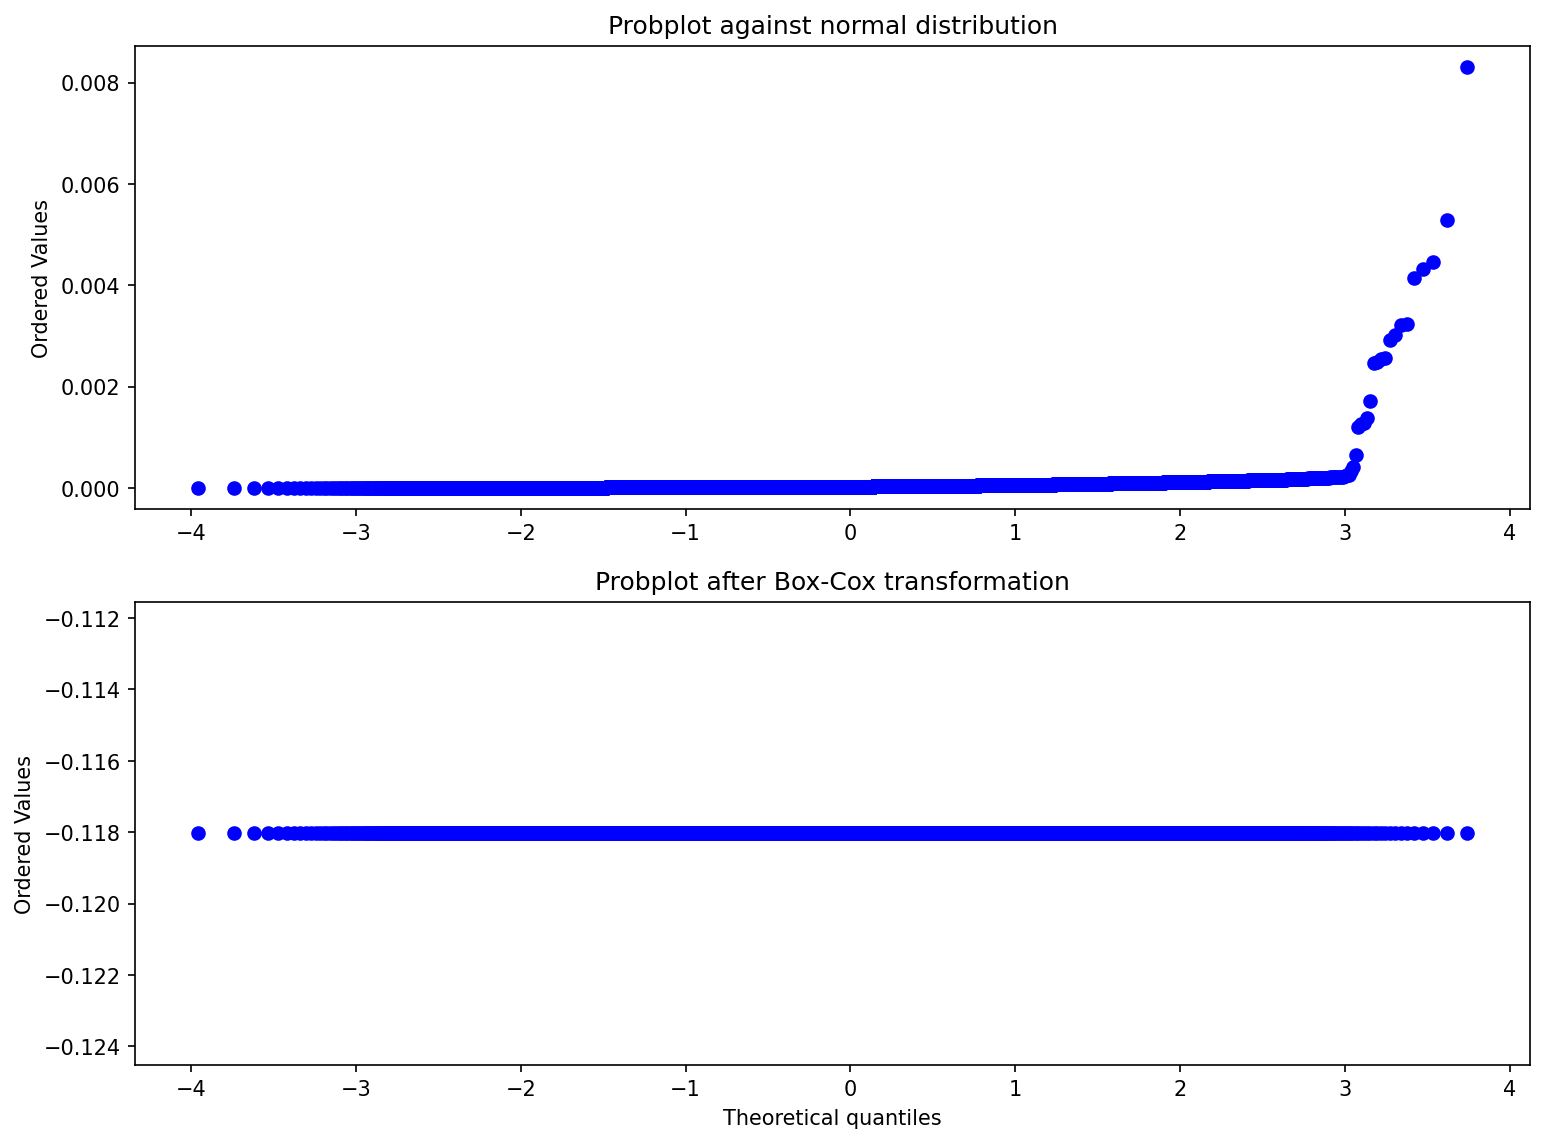

In [23]:
# df.loc['cobra'] = 10
m = df_copy > 0.02
print(df_copy.max())

df_copy.mask(m,other=np.nan, inplace=True)



print(df_copy.max())

from scipy import stats
x = df_copy['GesamtEnergie']

fig = plt.figure()

ax1 = fig.add_subplot(211)
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)

ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

count    18230.000000
mean         0.000042
std          0.000114
min          0.000002
25%          0.000020
50%          0.000030
75%          0.000049
max          0.008312
Name: GesamtEnergie, dtype: float64


<AxesSubplot:ylabel='Frequency'>

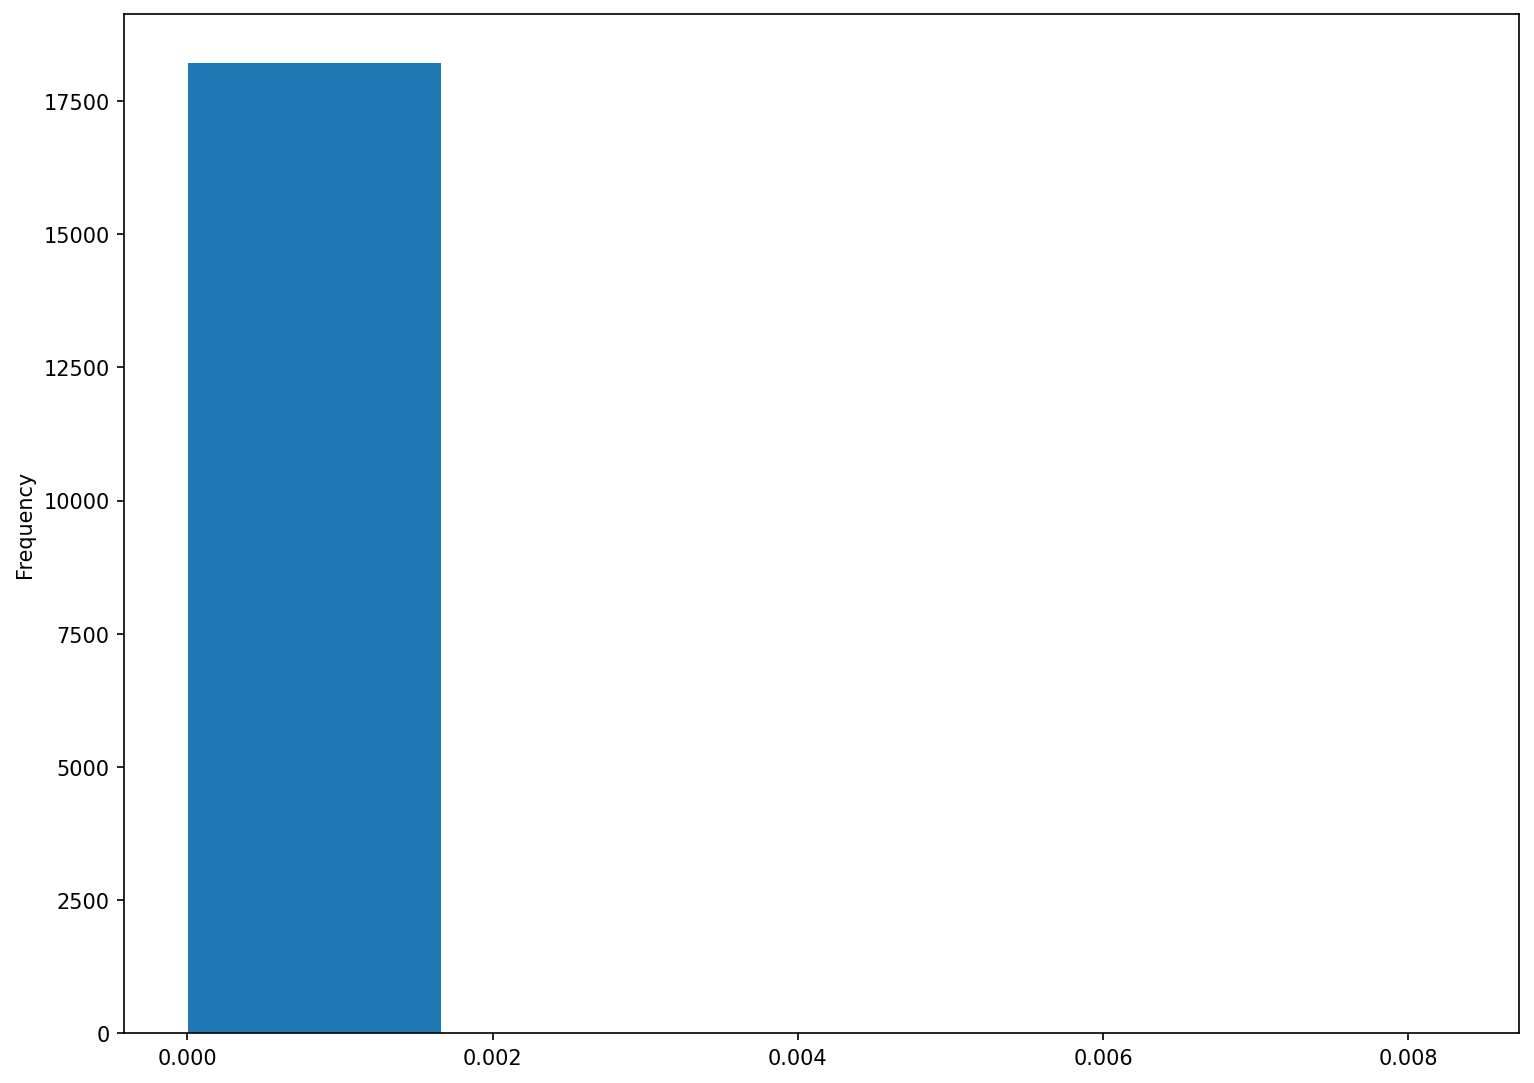

In [24]:
print(x.describe())

x.plot.hist(bins=5)

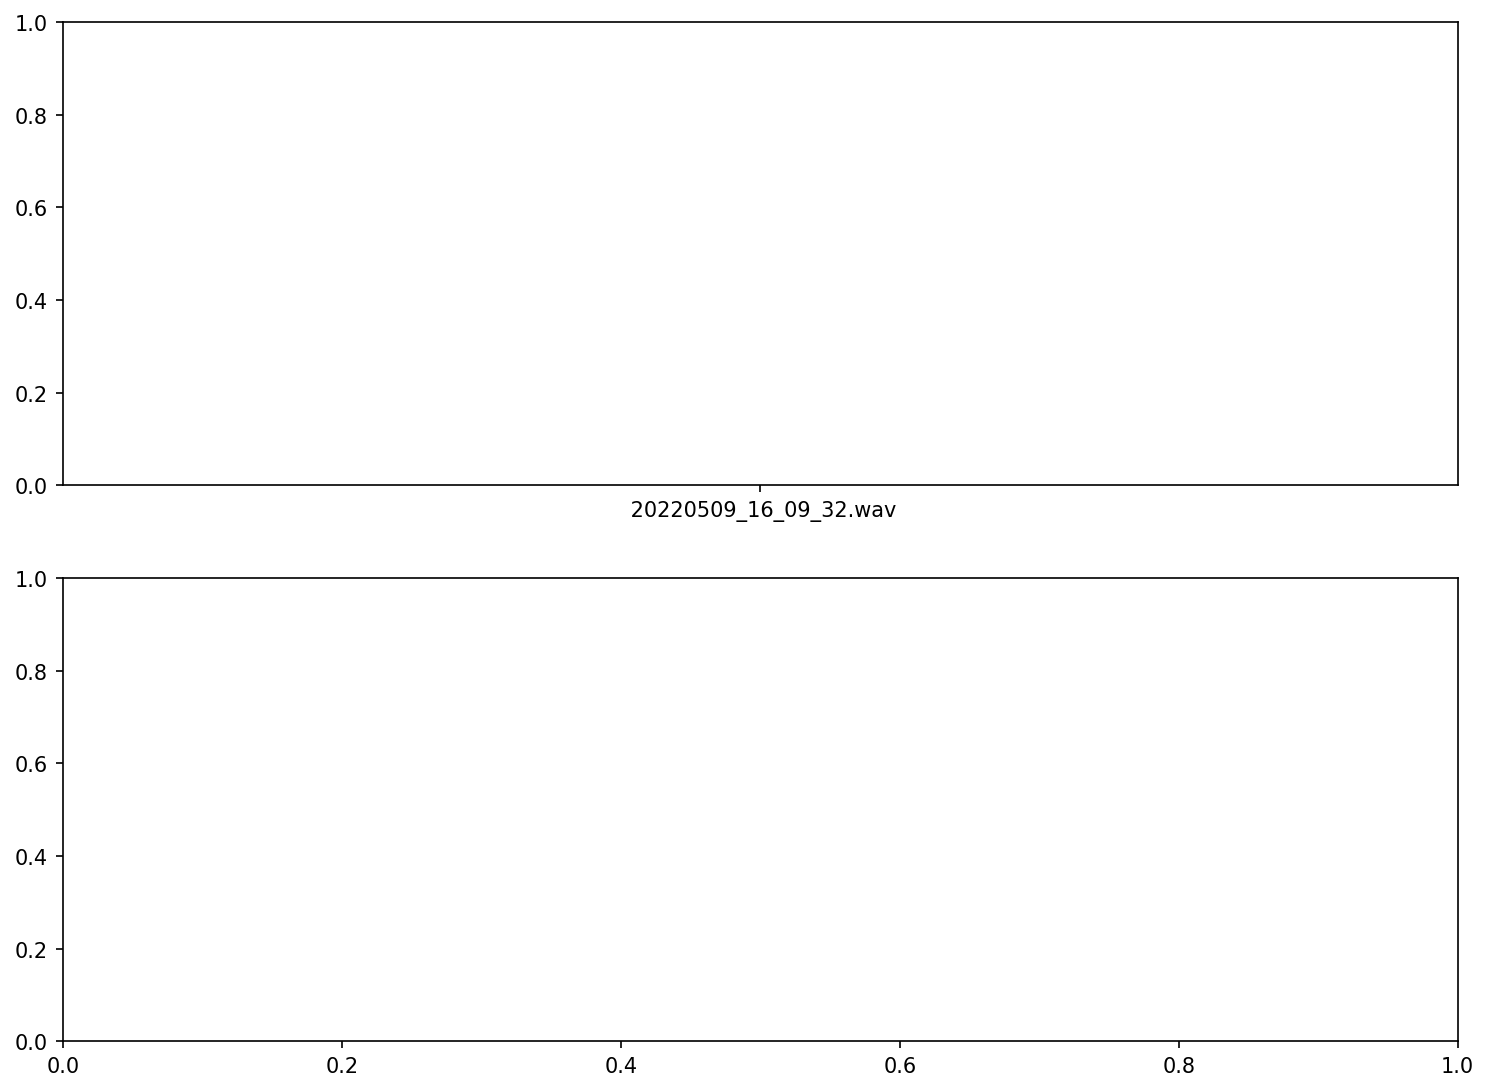

In [ ]:
#ax = df.plot.hist(bins=12, alpha=0.5, by='GesamtEnergie')
#plt.show()
print(x.head())

fig,ax = plt.subplots(2,1)



ax[0].plot( x.index,x[0])

plt.show()

In [51]:
import datetime
from datetime import datetime

form = '%y%m%d_%HH_%mm_%S'
fn = "20211231_16_10_21"
date_string = datetime.strptime(fn,form)
print(datetime)

error: redefinition of group name 'm' as group 5; was group 2 at position 109

In [ ]:
from main import chroma_plot